# Regression in Machine Learning

Regression is a machine learning technique which helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables.

### Linear Regression 
Check with Deatiled Notebook:
* https://github.com/dltk-ai/DLTK-e-learning/blob/master/ML%20Notebooks/Linear-%20Regression%20.ipynb

## Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

### Polynomial Regression is used for?
The goal of polynomial regression is to model a non-linear relationship between the independent variable **X** and dependent variable **y** technically, between the independent variable and the conditional mean of the dependent variable.

### Formula
A Polynomial regression line has an equation of the form **Y = b0 + b1 X^1 + b2 X^2 ⋯ bn X^n**, where **X** is the explanatory variable and **Y** is the dependent variable. The slope of the line is b1, b2 .. bn.

### Scikit-learn
Scikit-learn is a software machine learning library for the Python. It features various classification, regression and clustering algorithms.

### Importoing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing inbuilt datasets
from sklearn import datasets

#PFor plotting
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

 * " %matplotlib inline " helps in returning output plots without needing to write plt.show() code everytime after each plot!

### Loading Inbuilt Boston Housing Dataset

In [4]:
#loading Inbuilt dataset boston housing
dataset = datasets.load_boston()

### Checking Data Insights

In [5]:
#Checking Shape
dataset.data.shape

(506, 13)

 * Dataset comprises of 506 observations and 13 chracteriestics
 * Out of which one is dependent variable and rest are independent variables.

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

 * data: contains the information for various houses
 * target: values
 * feature_names: names of the features
 * DESCR: describes the dataset

In [7]:
#Shows data in the form of array
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
#Printing target
dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
#Provides features of dataset 
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
#Describes the dataset
dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

**Detailed Description of each feature is given here** -
* **CRIM**: Per capita crime rate by town
* **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
* **INDUS**: Proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: Nitric oxide concentration (parts per 10 million)
* **RM**: Average number of rooms per dwelling
* **AGE**: Proportion of owner-occupied units built prior to 1940
* **DIS**: Weighted distances to five Boston employment centers
* **RAD**: Index of accessibility to radial highways
* **TAX**: Full-value property tax rate per 10,000
* **PTRATIO**: Pupil-teacher ratio by town
* **LSTAT**: Percentage of lower status of the population
* **MEDV**: Median value of owner-occupied homes in 1000s


The prices of the house indicated by the variable **MEDV** is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

We will now load the data into a pandas dataframe using **pd.DataFrame**. 

In [11]:
#Loading dataset under dataframe, adding columns names as feature_names
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [12]:
#Printing Data
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
#Printinh Tail
data.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


### Exploratory Data Analysis begins

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Adding target variable with name 'MEDV' to our dataset.

In [14]:
#Adding 'MEDV'
data_new = pd.concat([data,pd.Series(dataset.target,name='MEDV')],axis=1)

In [15]:
#Checking with new added feature name
data_new.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [16]:
#Checking with new added feature
data_new.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


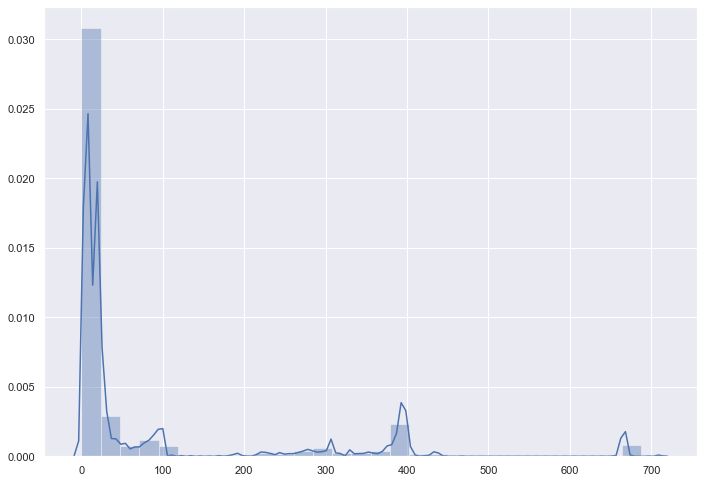

In [17]:
#graph for new dataset
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new, bins=30)
plt.show()

* We see that the values of MEDV are distributed normally with few outliers.
* We create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library, provided heatmap

#### Checking for missing values

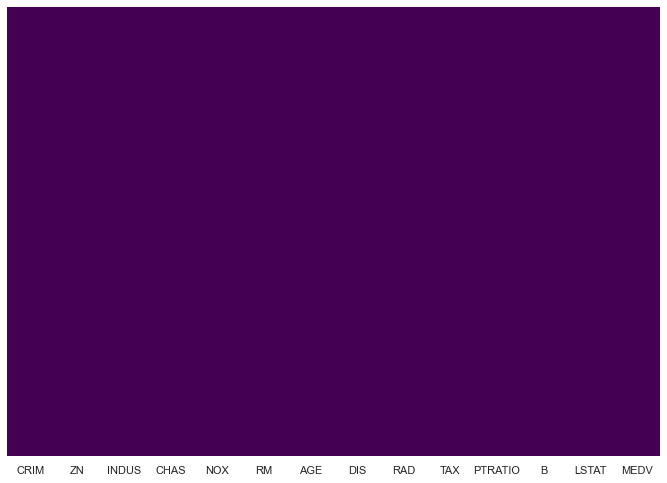

In [18]:
#To Check the missingvalues using heatmap
sns.heatmap(data_new.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

 * Complete cleaned dataset is there
 
 #### To check Correlation

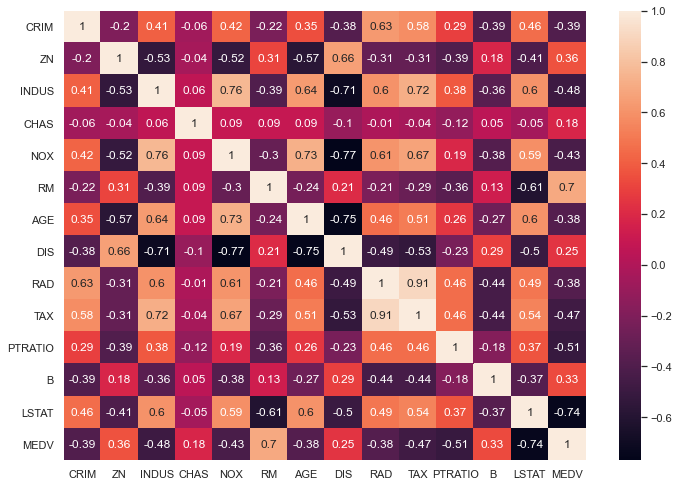

In [19]:
#Correlation check
corr = data_new.corr().round(2)
sns.heatmap(data=corr, annot=True)

#### Check for Data Types

In [20]:
#Checking info of new feature added dataset
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualization 
#### Distributions of Variables
* Target Feature as MEDV
* Creating Related Distrubution Graphs

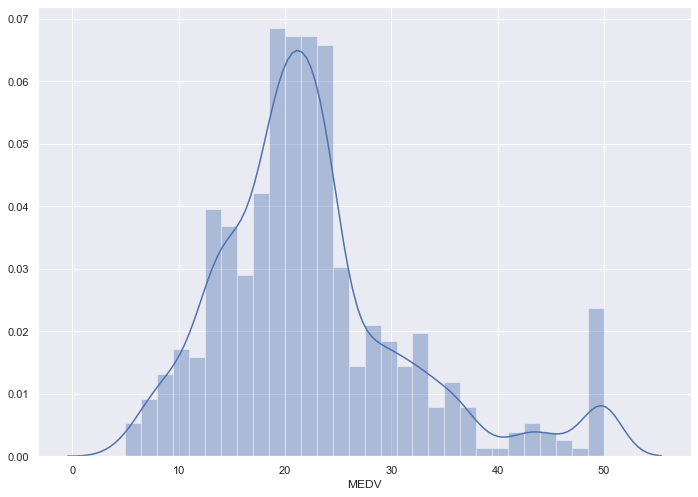

In [21]:
#Creating Histogram for MEDV 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['MEDV'], bins=30)
plt.show() 
 

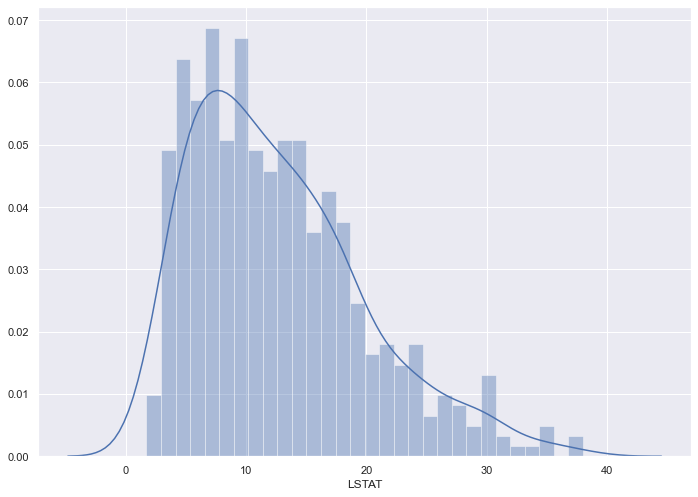

In [22]:
#Creating Histogram for LSTAT
#Percentage of lower status of the population
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['LSTAT'], bins=30)
plt.show() 
 

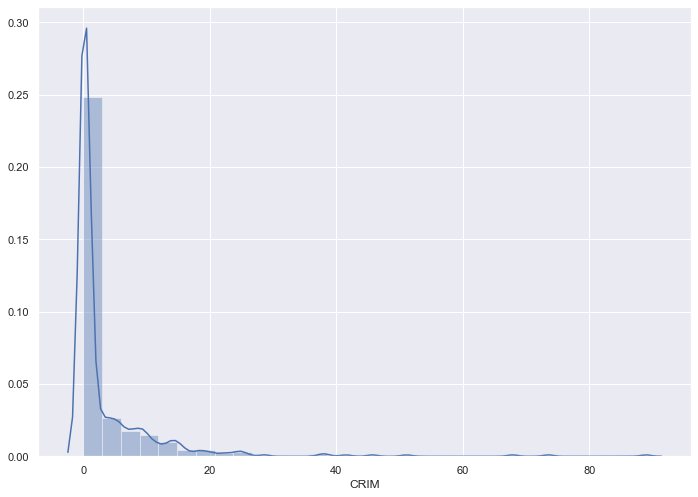

In [23]:
#Plotting Graph for Crimerate CRIM
#Per capita crime rate by town

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['CRIM'], bins=30)
plt.show() 

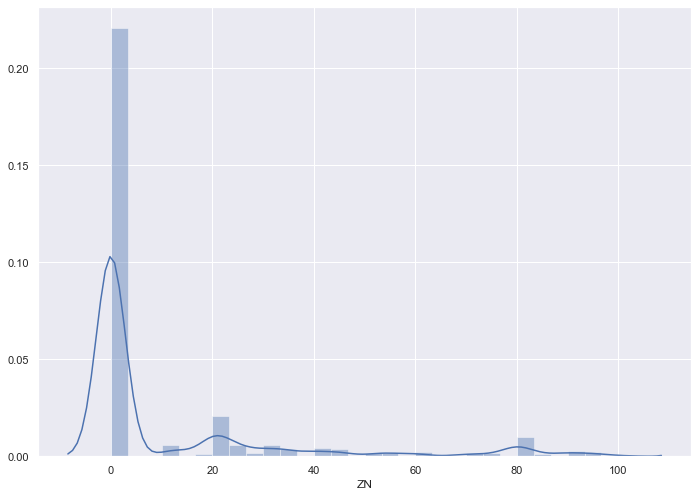

In [24]:
#Plotting graph for ZN - Residential Zone 
#Proportion of residential land zoned for lots over 25,000 sq. ft

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['ZN'], bins=30)
plt.show() 

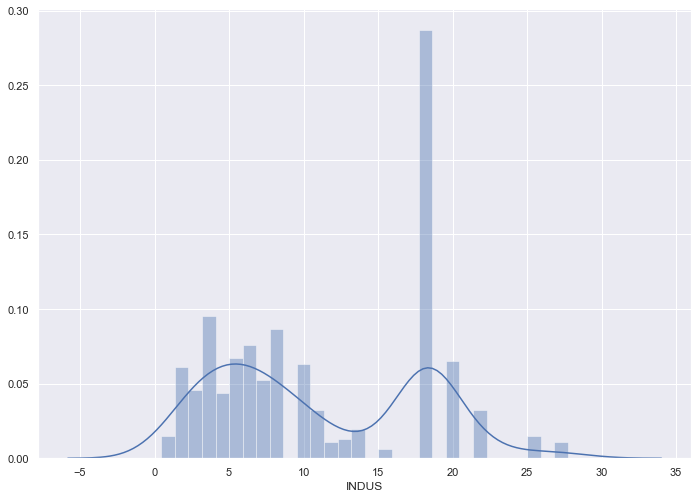

In [25]:
#Plotting graph for INDUS 
#Proportion of non-retail business acres per town
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['INDUS'], bins=30)
plt.show() 

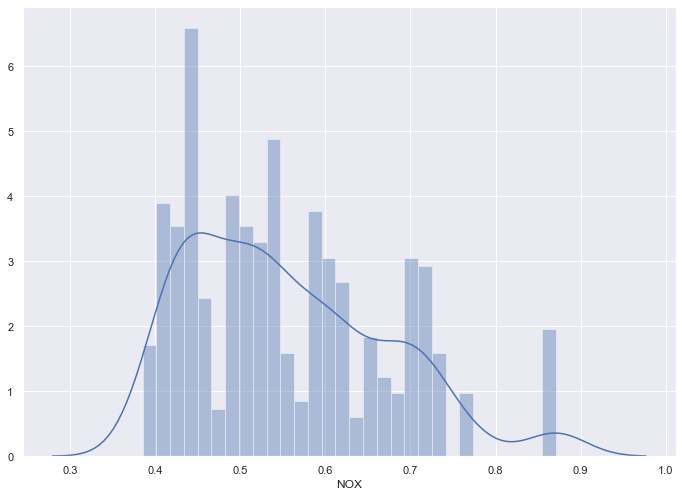

In [26]:
#PLotting a Graph fo NOX
#Nitric oxide concentration (parts per 10 million)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['NOX'], bins=30)
plt.show() 

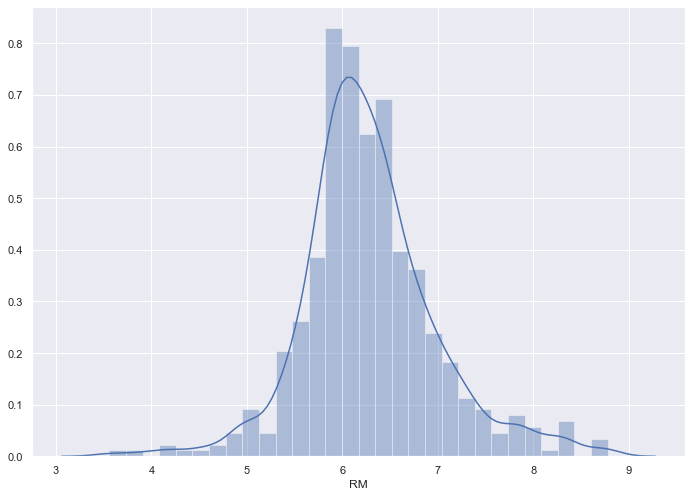

In [27]:
#Plotting a graph for Rooms RM
#Average number of rooms per dwelling
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['RM'], bins=30)
plt.show() 

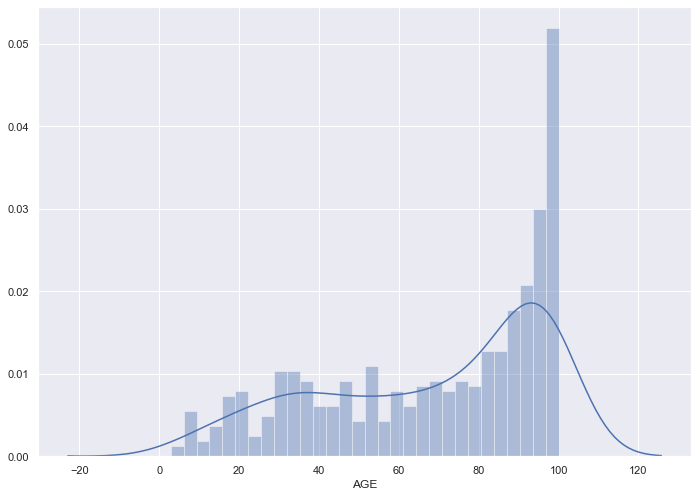

In [28]:
#Plotting a Graph for Age
#Proportion of owner-occupied units built prior to 1940
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['AGE'], bins=30)
plt.show() 

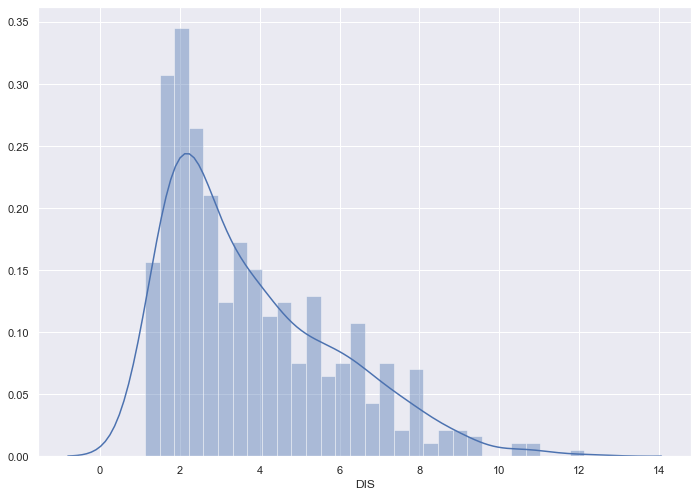

In [29]:
#Plotting a graph for distance DIS
#Weighted distances to five Boston employment centers

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['DIS'], bins=30)
plt.show() 

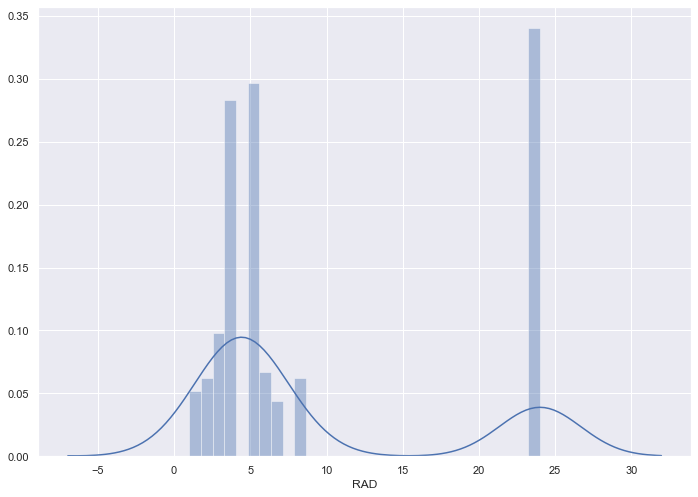

In [30]:
#Plotting a graph for radial highways - RAD
#Index of accessibility to radial highways
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['RAD'], bins=30)
plt.show() 

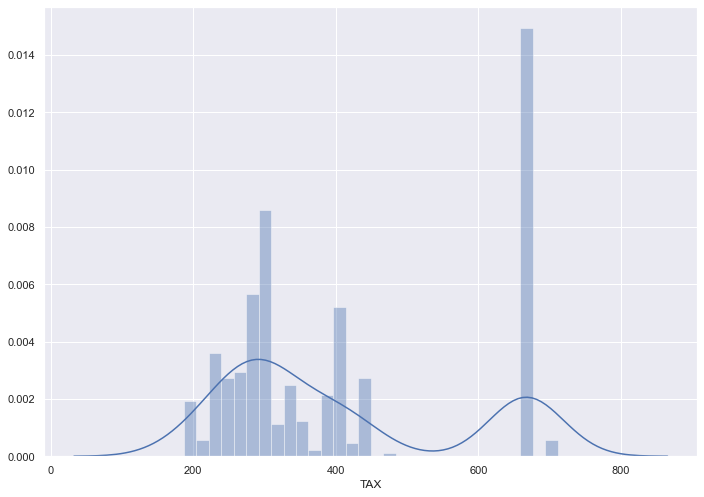

In [31]:
# Plotting graph for tax rate - TAX
#Full-value property tax rate per 10,000

        
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['TAX'], bins=30)
plt.show() 

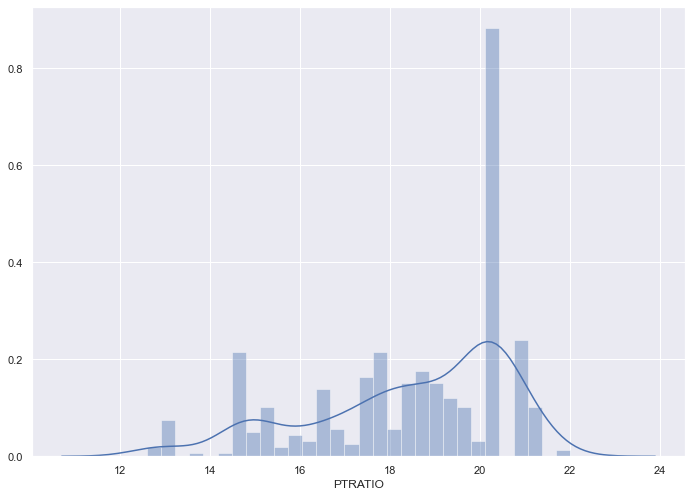

In [32]:
#Plotting a graph pupil
#Pupil-teacher ratio by town
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['PTRATIO'], bins=30)
plt.show() 

### Feature Engineering
* To fit a polynomial regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RAM has a strong positive correlation with MEDV where as LSTAT has a high negative correlation with MEDV

#### Model Training Starts

In [33]:
#Selecting X and y variables
#X feature as 2-D LSTAT from data_new
X = data_new[['LSTAT']]

#y feature as MEDV from data_new
y = data_new[['MEDV']]

In [34]:
#Printing X Feature
X

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [35]:
#Printing y feature
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


#### Train split data

In [36]:
#Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42,shuffle=True)

In [37]:
#Printing X_train
X_train

,LSTAT
281,4.59
22,18.72
101,7.67
268,3.16
485,10.58
...,...
106,18.66
270,13.00
348,5.99
435,23.27


In [38]:
#Printing X_test
X_test

,LSTAT
173,9.04
274,3.53
491,18.07
72,5.52
452,17.27
76,11.97
316,18.33
140,24.16
471,12.87
500,14.33


In [39]:
#Printing y_train
y_train

,MEDV
281,35.4
22,15.2
101,26.5
268,43.5
485,21.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [40]:
#Printing y_test
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
76,20.0
316,17.8
140,14.0
471,19.6
500,16.8


#### What are these Polynomial Features?

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. 
This process can be repeated for each input variable in the dataset, creating a transformed version of each is called polynomial features.
The creation of new input features based on the existing features.


#### What is Degree in Polynomial Features?

The “degree” of the polynomial is used to control the number of features added, a degree of 3 will add two new variables for each input variable. 

 
    Degree  Name	Example

    2	Quadratic	x2−x+2
    
    3	Cubic	    x3−x2+5
    
    4	Quartic      6x4−x3+x−2
    
    5	Quintic	  x5−3x3+x2+8

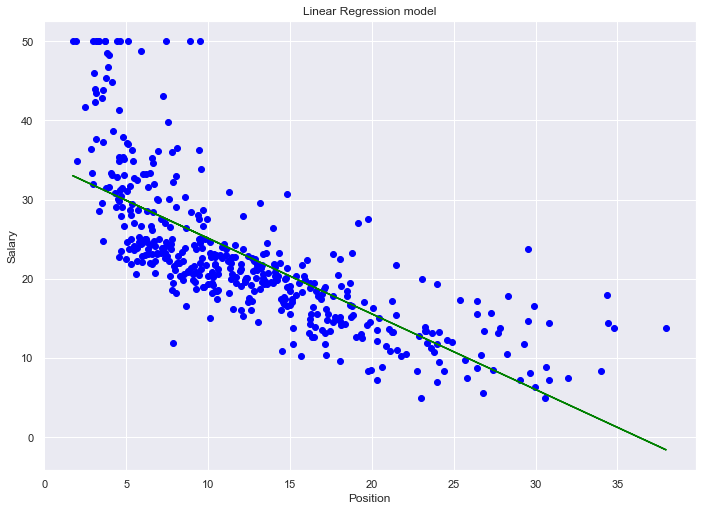

In [65]:
from sklearn.linear_model import LinearRegression  
linear_regression= LinearRegression()  
linear_regression.fit(X_train,y_train)   
    
#Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  

#adding Polynomial features of degree = 3 
poly_regression= PolynomialFeatures(degree= 3)  

#Fit transforming X_train features to ploynomial regression
poly= poly_regression.fit_transform(X_train)  
linear_regression_2 =LinearRegression()  
linear_regression_2.fit(poly, y_train)  


#Visulaizing the result for Linear Regression model  
plt.scatter(X_train,y_train,color="blue")  
plt.plot(X_train,linear_regression.predict(X_train), color="green")  
plt.title("Linear Regression model")  
plt.xlabel("Position")  
plt.ylabel("Salary")  
plt.show()  




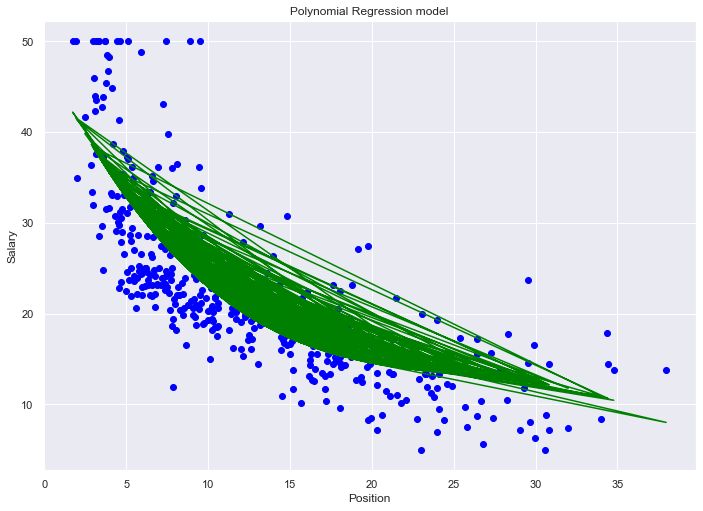

In [49]:

#Visulaizing the result for Polynomial Regression  
plt.scatter(X_train,y_train,color="blue")  
plt.plot(X_train, linear_regression_2.predict(poly_regression.fit_transform(X_train)), color="green")  
plt.title("Polynomial Regression model")  
plt.xlabel("Position")  
plt.ylabel("Salary")  
plt.show()  

In [50]:
#making predictions using polynomial regression features

poly_fit = poly_regression.fit_transform(X_train)
prediction = linear_regression_2.predict(poly_fit)

#Printing Prediction of Polynomial Regression features
prediction

array([[33.85352355],
       [15.06218961],
       [26.94300664],
       [37.77351429],
       [22.10734202],
       [16.18604194],
       [37.28221833],
       [23.53746802],
       [15.17884421],
       [23.72724569],
       [33.29234066],
       [36.07036184],
       [20.64005513],
       [31.62587194],
       [13.722264  ],
       [15.86857415],
       [28.86404176],
       [34.55724377],
       [14.93812412],
       [18.02963695],
       [26.80848329],
       [13.58292473],
       [31.43647613],
       [22.5523079 ],
       [12.23629242],
       [19.87947082],
       [35.9322888 ],
       [14.21510138],
       [13.54897839],
       [24.90204218],
       [13.12884735],
       [24.13069392],
       [13.25005814],
       [20.6030441 ],
       [26.22405167],
       [16.2936651 ],
       [30.17152552],
       [29.9706348 ],
       [17.64683879],
       [22.78818909],
       [13.0879637 ],
       [19.95973572],
       [19.49958586],
       [28.03329205],
       [21.36939043],
       [23

#### What is Mean Squared Error?

The mean squared error (MSE) or mean squared deviation (MSD) of an estimator of a procedure for estimating an unobserved quantity which measures the average of the squares of the errors, (i.e) the average squared difference between the estimated values and the actual value. 

#### What is r2 score?

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. ... It may also be known as the coefficient of determination.

In [51]:
from sklearn.metrics import mean_squared_error

#Calculating Mean Square error
mse = (np.sqrt(mean_squared_error(y_train, prediction)))


from sklearn.metrics import r2_score 

#Calculating r2 score
r2 = r2_score(y_train, prediction)

In [52]:
print("The model performance")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance
--------------------------------------
MSE is 5.485537892587865
R2 score is 0.6526254140725216


